# Kernel Density Estimation

## Load Data

In [1]:
import math
import numpy as np
from sklearn.datasets import load_iris

In [2]:
X = load_iris().data[:, 1]

In [3]:
import matplotlib.pyplot as plt

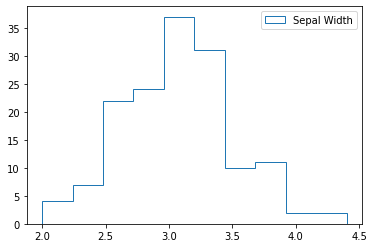

In [4]:
fig, ax = plt.subplots()
ax.hist(X, histtype='step', label='Sepal Width')
ax.legend()
plt.show()

---

## My Kernel Density Estimation

In [5]:
class MyKDE:
    def __init__(self, width):
        self.width = width
    
    def gaussian(self, x):
        return 1/np.sqrt(2*math.pi)*np.exp(-0.5*(x**2))

    def fit(self, X):
        X = np.array(X)
        X0 = np.arange(np.floor(np.min(X)), np.ceil(np.max(X)), 0.001)
        yhat = np.zeros(len(X0))
        for i in range(len(X0)):
            yhat[i] = np.sum(self.gaussian(abs(X-X0[i])/self.width))/(len(X)*self.width)
        fig, ax = plt.subplots()
        ax.plot(X0, yhat)
        ax.set_ylabel('Density')
        plt.show()

In [6]:
kde = MyKDE(width=0.2)

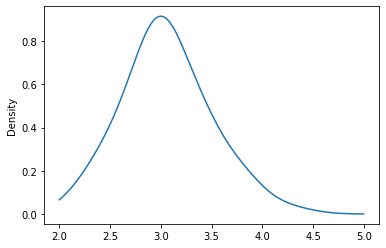

In [7]:
kde.fit(X)

---

## Compare to Seaborn

In [8]:
import seaborn as sns

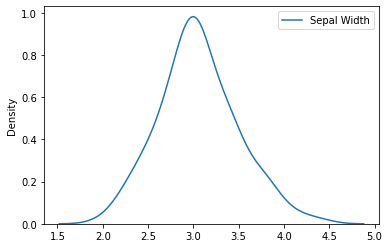

In [9]:
fig, ax = plt.subplots()
sns.kdeplot(X, label='Sepal Width', ax=ax)
ax.legend()
plt.show()